In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
import pandas as pd, numpy as np, os, sys
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import display, HTML

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

font = {'size'   : 18}
matplotlib.rc('font', **font)

def plotHorizontalBars(series, xlabel, title):
    xpos = np.arange(len(series.index), 0, -1)
    plt.barh(xpos, series, align='center', alpha=0.5, color='g')
    plt.grid(axis='x')
    plt.yticks(xpos, series.index)
    plt.xlabel(xlabel)
    plt.title(title)

def plotVerticalBars(series, ylabel, title):
    xpos = np.arange(len(series.index), 0, -1)
    plt.bar(xpos, series, align='center', alpha=0.5, color='g')
    plt.grid(axis='y')
    plt.xticks(xpos, series.index)
    plt.ylabel(ylabel)
    plt.title(title)

In [3]:
start_date = dt.datetime(2020, 3, 7)
daily_cases = [351, 517, 671, 931, 1240, 1690, 2226, 2943, 3738, 4669, 6427, 9351, 13611, 19700, 26800,
               35120, 46100, 55100, 69150, 86000, 104800, 124600, 142600, 164600]
dates=[]
for i in range(len(daily_cases)):
    dates.append(start_date + dt.timedelta(days=i))
daily_cases = list(zip(dates, daily_cases))
daily_cases_df = pd.DataFrame(daily_cases, columns=['date', 'cases'])
daily_cases_df['log_cases'] = np.log(daily_cases_df.cases)
daily_cases_df['date_index'] = daily_cases_df.index
daily_cases_df.date_index += 1
display(daily_cases_df)

,date,cases,log_cases,date_index
0,2020-03-07,351,5.860786,1
1,2020-03-08,517,6.248043,2
2,2020-03-09,671,6.508769,3
3,2020-03-10,931,6.836259,4
4,2020-03-11,1240,7.122867,5
5,2020-03-12,1690,7.432484,6
6,2020-03-13,2226,7.707962,7
7,2020-03-14,2943,7.987185,8
8,2020-03-15,3738,8.226306,9
9,2020-03-16,4669,8.448700,10


Coefficients: [[ 0.          0.22161616  0.00971536 -0.0003364 ]]
Intercept: [5.74499797]


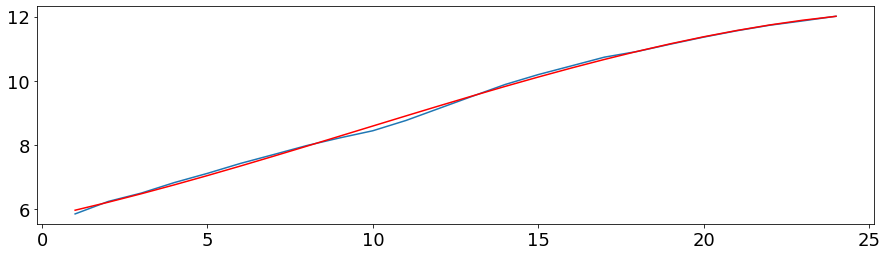

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

x = daily_cases_df.date_index.values.reshape(-1, 1)
poly = PolynomialFeatures(degree=3)
xp = poly.fit_transform(x)

y = daily_cases_df.log_cases.values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(xp, y)
y_fit = reg.predict(xp)

print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

plt.figure(figsize=(15, 4))
plt.plot(x, y)
plt.plot(x, y_fit, color='red')
plt.show()

In [5]:
x_fut = x.copy()
x_fut -= x.min()
x_fut += x.max()
xp_fut = poly.fit_transform(x_fut)
y_fut = reg.predict(xp_fut)

print(y_fut)
y_fut = np.exp(y_fut).astype(int)

x_fut = np.apply_along_axis(lambda x: (start_date+dt.timedelta(days=int(x))).strftime('%Y-%m-%d'),
                            arr=x_fut, axis=1)
mat = np.c_[x_fut, y_fut]
print(mat)

[[12.0094155 ]
 [12.10122475]
 [12.16200445]
 [12.1897362 ]
 [12.18240158]
 [12.13798219]
 [12.05445961]
 [11.92981543]
 [11.76203125]
 [11.54908864]
 [11.28896921]
 [10.97965454]
 [10.61912621]
 [10.20536583]
 [ 9.73635497]
 [ 9.21007523]
 [ 8.6245082 ]
 [ 7.97763547]
 [ 7.26743862]
 [ 6.49189924]
 [ 5.64899893]
 [ 4.73671928]
 [ 3.75304187]
 [ 2.69594829]]
[['2020-03-31' '164294']
 ['2020-04-01' '180092']
 ['2020-04-02' '191377']
 ['2020-04-03' '196759']
 ['2020-04-04' '195321']
 ['2020-04-05' '186835']
 ['2020-04-06' '171864']
 ['2020-04-07' '151723']
 ['2020-04-08' '128287']
 ['2020-04-09' '103682']
 ['2020-04-10' '79935']
 ['2020-04-11' '58668']
 ['2020-04-12' '40909']
 ['2020-04-13' '27047']
 ['2020-04-14' '16921']
 ['2020-04-15' '9997']
 ['2020-04-16' '5566']
 ['2020-04-17' '2915']
 ['2020-04-18' '1432']
 ['2020-04-19' '659']
 ['2020-04-20' '284']
 ['2020-04-21' '114']
 ['2020-04-22' '42']
 ['2020-04-23' '14']]
